In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.nn.functional as F
import time 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading Data
def DataLoader(batch_size_train, batch_size_test):
    Train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('./data', train=True, download=True, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])), batch_size = batch_size_train, shuffle = True)
    Test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('./data', train=False, download=True, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])), batch_size = batch_size_test, shuffle=True)
    return Train_loader, Test_loader    

# Ques 1

In [3]:
#These parameters will remain same throughout the program
Epochs = 10

#Loss Function
cost = nn.CrossEntropyLoss()

In [4]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        #Stride = 1 by default, using padding 2
        self.Conv1 = nn.Sequential(nn.Conv2d(1, 16, kernel_size = 5, padding = 2), nn.ReLU(), nn.MaxPool2d(2, 2))
        self.Conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size = 5, padding = 2), nn.ReLU(), nn.MaxPool2d(2, 2))
        #Dropout Layer
        self.drop_out = nn.Dropout2d()
        #Fully connected Layer
        self.fc1 = nn.Linear(7 * 7 * 32, 50)
        self.fc2 = nn.Linear(50, 10)
        
    #Forward Pass    
    def forward(self, x):
        out = self.Conv1(x)
        out = self.Conv2(out)
        out = self.drop_out(out)
        #Reshaping for fully connected layer
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        return out     

In [5]:
def train(net, epoch, opt, cost, loss_list, acc_list, train_loader, test_loader, bs):
    #Going into training mode for model
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        #Running the forward pass
        outputs = net(images)
        loss = cost(outputs, labels)

        #Backpropogation and optimization
        opt.zero_grad()
        loss.backward()
        opt.step()

        #Saving and Printing the loss after every 2000 images
        if (i+1) % bs == 0:
            loss_list.append(loss.item())
            acc = test(net,test_loader)
            acc_list.append("{:.2f}".format(acc))
            
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.4f}'.format(epoch, i * len(images), len(train_loader.dataset), 100. * i / len(train_loader), loss.item()))
                  

In [6]:
def test(net, test_loader):
    #Going into network evaluation mode
    net.eval()
    
    #No gradients will be calculated for testing mode
    with torch.no_grad():
        #Calculating and saving loss after every 2000 images
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(test_loader):
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = (correct/total)*100
                
    return accuracy

In [7]:
def plot_loss(loss_list):
    #Due to different batch_sizes, leading to different length of list, defining custom labels
    l = 60000/len(loss_list)
    labels = np.arange(0,60000,l)
    #Plotting the loss graph
    fig = plt.figure()
    plt.plot(labels,loss_list, color='blue')
    plt.xlabel('Number of training examples seen')
    plt.ylabel('Training Loss')

In [8]:
def plot_acc(acc_list):
    #Due to different batch_sizes, leading to different length of list, defining custom labels
    l = 60000/(len(acc_list))
    labels = np.arange(0,60000,l)
    #Plotting the accuracy graph
    fig = plt.figure()
    plt.plot(labels,acc_list, color='red')
    plt.xlabel('Number of training examples seen')
    plt.ylabel('Test Accuracy')
    

In [9]:
#Defining the batch_sizes
train1, test1 = DataLoader(50, 50)
train2, test2 = DataLoader(1, 1)
train3, test3 = DataLoader(100, 100)
train4, test4 = DataLoader(1000, 1000)
train5, test5 = DataLoader(10000, 10000)

#Learning rates used
Lr1 = 0.01
Lr2 = 0.1
Lr3 = 0.001
Lr4 = 0.0001

# Ques 2

In [10]:
#Defining the model
net = CNNModel()

#Optimizer
opt1 = torch.optim.SGD(net.parameters(), lr=Lr1)

#For Plotting
loss_list = []
acc_list = []

In [11]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt1, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc1 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 2.2222
Train Epoch: 1 [3950/60000 (7%)]	Loss: 1.8655
Train Epoch: 1 [5950/60000 (10%)]	Loss: 1.1914
Train Epoch: 1 [7950/60000 (13%)]	Loss: 0.7797
Train Epoch: 1 [9950/60000 (17%)]	Loss: 0.9003
Train Epoch: 1 [11950/60000 (20%)]	Loss: 0.7105
Train Epoch: 1 [13950/60000 (23%)]	Loss: 0.3667
Train Epoch: 1 [15950/60000 (27%)]	Loss: 0.3683
Train Epoch: 1 [17950/60000 (30%)]	Loss: 0.3604
Train Epoch: 1 [19950/60000 (33%)]	Loss: 0.2798
Train Epoch: 1 [21950/60000 (37%)]	Loss: 0.3477
Train Epoch: 1 [23950/60000 (40%)]	Loss: 0.2660
Train Epoch: 1 [25950/60000 (43%)]	Loss: 0.5118
Train Epoch: 1 [27950/60000 (47%)]	Loss: 0.1945
Train Epoch: 1 [29950/60000 (50%)]	Loss: 0.1741
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.4001
Train Epoch: 1 [33950/60000 (57%)]	Loss: 0.3458
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.3310
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.1918
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.2219
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.1270

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.0357
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0067
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.0599
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.0340
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.0258
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.1065
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.0098
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.0277
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.0215
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.0115
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.0909
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.0351
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.0173
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.0323
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.0084
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0320
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.0072
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.0202
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0139
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.0318
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.003

In [12]:
print('Test Accuracy with SGD Optimizer on the 10000 test images: ', "{:.4f}".format(acc1))

Test Accuracy with SGD Optimizer on the 10000 test images:  98.9800


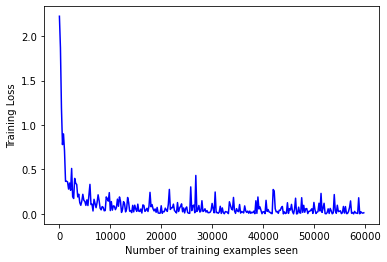

In [13]:
#Plotting Training Loss
plot_loss(loss_list)

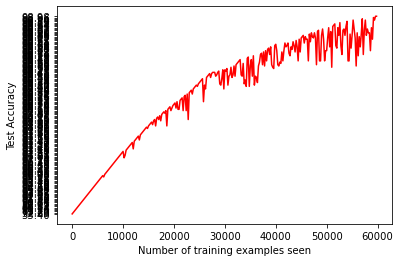

In [14]:
#Plotting Testing Accuracy over examples
plot_acc(acc_list)

# Ques 3

3.a

In [15]:
#Defining new model
net = CNNModel()

#Defining new Optimizer
momentum = 0.5
opt2 = torch.optim.SGD(net.parameters(), lr=Lr1, momentum = momentum)


#For Plotting
loss_list = []
acc_list = []

In [16]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt2, cost, loss_list,acc_list, train1, test1, 40)
    
#Testing
acc2 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 2.1821
Train Epoch: 1 [3950/60000 (7%)]	Loss: 0.9919
Train Epoch: 1 [5950/60000 (10%)]	Loss: 0.7691
Train Epoch: 1 [7950/60000 (13%)]	Loss: 0.4653
Train Epoch: 1 [9950/60000 (17%)]	Loss: 0.3801
Train Epoch: 1 [11950/60000 (20%)]	Loss: 0.3421
Train Epoch: 1 [13950/60000 (23%)]	Loss: 0.3412
Train Epoch: 1 [15950/60000 (27%)]	Loss: 0.2235
Train Epoch: 1 [17950/60000 (30%)]	Loss: 0.2075
Train Epoch: 1 [19950/60000 (33%)]	Loss: 0.1482
Train Epoch: 1 [21950/60000 (37%)]	Loss: 0.0669
Train Epoch: 1 [23950/60000 (40%)]	Loss: 0.1179
Train Epoch: 1 [25950/60000 (43%)]	Loss: 0.2344
Train Epoch: 1 [27950/60000 (47%)]	Loss: 0.0763
Train Epoch: 1 [29950/60000 (50%)]	Loss: 0.0549
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.2516
Train Epoch: 1 [33950/60000 (57%)]	Loss: 0.1034
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.1208
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.2144
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.2214
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.0849

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.0285
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0086
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.0308
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.0339
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.1673
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.0237
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.1502
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.0062
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.0199
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.0241
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.0166
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.0255
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.0773
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.0019
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.0478
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0098
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.0101
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.0015
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0013
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.0353
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.003

In [17]:
print('Test Accuracy with SGD Optimizer with momentum on the 10000 test images: ', "{:.4f}".format(acc2))

Test Accuracy with SGD Optimizer with momentum on the 10000 test images:  98.7800


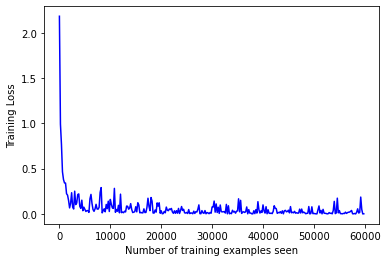

In [18]:
plot_loss(loss_list)

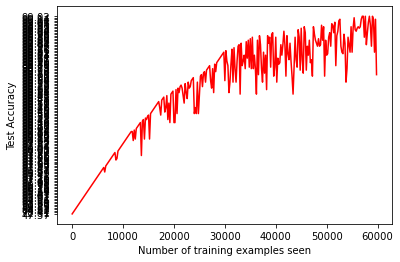

In [19]:
plot_acc(acc_list)

3.b

In [20]:
net = CNNModel()

#Optimizer
opt3 = torch.optim.RMSprop(net.parameters(), lr=Lr1)

#For Plotting
loss_list = []
acc_list = []

In [21]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt3, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc3 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 2.3055
Train Epoch: 1 [3950/60000 (7%)]	Loss: 2.2926
Train Epoch: 1 [5950/60000 (10%)]	Loss: 2.2595
Train Epoch: 1 [7950/60000 (13%)]	Loss: 1.9072
Train Epoch: 1 [9950/60000 (17%)]	Loss: 1.2246
Train Epoch: 1 [11950/60000 (20%)]	Loss: 0.9713
Train Epoch: 1 [13950/60000 (23%)]	Loss: 0.3453
Train Epoch: 1 [15950/60000 (27%)]	Loss: 0.3537
Train Epoch: 1 [17950/60000 (30%)]	Loss: 0.2174
Train Epoch: 1 [19950/60000 (33%)]	Loss: 0.2573
Train Epoch: 1 [21950/60000 (37%)]	Loss: 0.2175
Train Epoch: 1 [23950/60000 (40%)]	Loss: 0.3969
Train Epoch: 1 [25950/60000 (43%)]	Loss: 0.1776
Train Epoch: 1 [27950/60000 (47%)]	Loss: 0.2655
Train Epoch: 1 [29950/60000 (50%)]	Loss: 0.3596
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.1399
Train Epoch: 1 [33950/60000 (57%)]	Loss: 0.2056
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.1822
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.2312
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.1631
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.3857

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.2065
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0733
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.1165
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.0421
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.0771
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.0381
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.0276
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.2360
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.5276
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.0166
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.0458
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.0917
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.0435
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.0848
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.0063
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0088
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.0363
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.1177
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0219
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.0796
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.000

In [22]:
print('Test Accuracy with RMSProp on the 10000 test images: ', "{:.4f}".format(acc3))

Test Accuracy with RMSProp on the 10000 test images:  97.6200


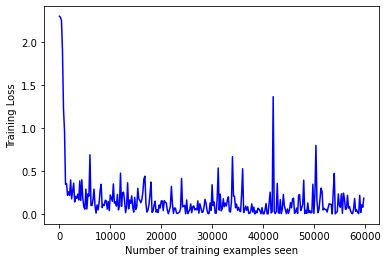

In [23]:
plot_loss(loss_list)

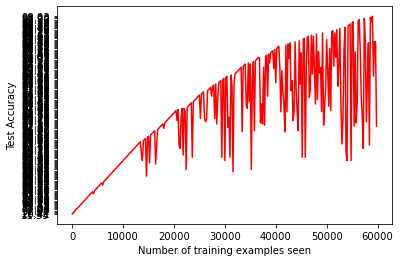

In [24]:
plot_acc(acc_list)

3.c

In [25]:
net = CNNModel()

#Optimizer
opt4 = torch.optim.Adam(net.parameters(), lr=Lr1)

#For Plotting
loss_list = []
acc_list = []

In [26]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt4, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc4 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 0.6679
Train Epoch: 1 [3950/60000 (7%)]	Loss: 0.2070
Train Epoch: 1 [5950/60000 (10%)]	Loss: 0.2068
Train Epoch: 1 [7950/60000 (13%)]	Loss: 0.1366
Train Epoch: 1 [9950/60000 (17%)]	Loss: 0.0551
Train Epoch: 1 [11950/60000 (20%)]	Loss: 0.1833
Train Epoch: 1 [13950/60000 (23%)]	Loss: 0.1049
Train Epoch: 1 [15950/60000 (27%)]	Loss: 0.2321
Train Epoch: 1 [17950/60000 (30%)]	Loss: 0.1745
Train Epoch: 1 [19950/60000 (33%)]	Loss: 0.1027
Train Epoch: 1 [21950/60000 (37%)]	Loss: 0.1827
Train Epoch: 1 [23950/60000 (40%)]	Loss: 0.0229
Train Epoch: 1 [25950/60000 (43%)]	Loss: 0.1511
Train Epoch: 1 [27950/60000 (47%)]	Loss: 0.5322
Train Epoch: 1 [29950/60000 (50%)]	Loss: 0.1246
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.0831
Train Epoch: 1 [33950/60000 (57%)]	Loss: 0.0599
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.0127
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.1818
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.0498
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.1099

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.0137
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0025
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.0853
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.0381
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.0021
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.0816
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.1915
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.1133
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.8001
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.2654
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.1191
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.2373
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.0243
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.0309
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.0107
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0557
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.2903
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.0865
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0489
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.0301
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.004

In [27]:
print('Test Accuracy with Adam on the 10000 test images:', "{:.4f}".format(acc4))

Test Accuracy with Adam on the 10000 test images: 97.9100


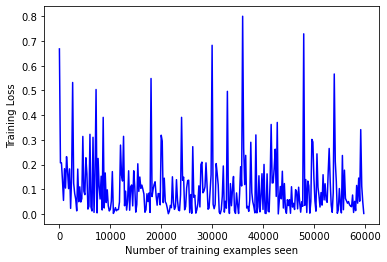

In [28]:
plot_loss(loss_list)

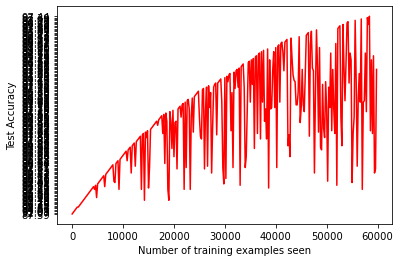

In [29]:
plot_acc(acc_list)

Best optimizer performance is of SGD with momentum 

# Ques 4

4.a

In [30]:
net = CNNModel()

#Taking best Optimizer from previous part
opt5 = torch.optim.SGD(net.parameters(), lr=Lr1, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [31]:
time1 = []
#Training
for epoch in range(1, Epochs + 1):
    #Saving Time of all epochs
    t0 = time.time()
    train(net, epoch, opt5, cost, loss_list, acc_list, train2, test2, 2000)
    t1 = time.time() - t0
    time1.append(t1)

#Testing
acc5 = test(net, test2)

Train Epoch: 1 [1999/60000 (3%)]	Loss: 3.5903
Train Epoch: 1 [3999/60000 (7%)]	Loss: 0.0005
Train Epoch: 1 [5999/60000 (10%)]	Loss: 1.1935
Train Epoch: 1 [7999/60000 (13%)]	Loss: 0.0000
Train Epoch: 1 [9999/60000 (17%)]	Loss: 0.0322
Train Epoch: 1 [11999/60000 (20%)]	Loss: 0.0000
Train Epoch: 1 [13999/60000 (23%)]	Loss: 0.0013
Train Epoch: 1 [15999/60000 (27%)]	Loss: 0.0011
Train Epoch: 1 [17999/60000 (30%)]	Loss: 0.0000
Train Epoch: 1 [19999/60000 (33%)]	Loss: 0.0000
Train Epoch: 1 [21999/60000 (37%)]	Loss: 0.0000
Train Epoch: 1 [23999/60000 (40%)]	Loss: 0.0000
Train Epoch: 1 [25999/60000 (43%)]	Loss: 0.0000
Train Epoch: 1 [27999/60000 (47%)]	Loss: 0.0000
Train Epoch: 1 [29999/60000 (50%)]	Loss: 0.0000
Train Epoch: 1 [31999/60000 (53%)]	Loss: 0.0000
Train Epoch: 1 [33999/60000 (57%)]	Loss: 0.6409
Train Epoch: 1 [35999/60000 (60%)]	Loss: 0.0000
Train Epoch: 1 [37999/60000 (63%)]	Loss: 2.2888
Train Epoch: 1 [39999/60000 (67%)]	Loss: 0.0000
Train Epoch: 1 [41999/60000 (70%)]	Loss: 0.0010

Train Epoch: 6 [45999/60000 (77%)]	Loss: 2.2153
Train Epoch: 6 [47999/60000 (80%)]	Loss: 2.4351
Train Epoch: 6 [49999/60000 (83%)]	Loss: 2.3806
Train Epoch: 6 [51999/60000 (87%)]	Loss: 2.3099
Train Epoch: 6 [53999/60000 (90%)]	Loss: 2.3752
Train Epoch: 6 [55999/60000 (93%)]	Loss: 2.3227
Train Epoch: 6 [57999/60000 (97%)]	Loss: 2.2053
Train Epoch: 6 [59999/60000 (100%)]	Loss: 2.2926
Train Epoch: 7 [1999/60000 (3%)]	Loss: 2.3246
Train Epoch: 7 [3999/60000 (7%)]	Loss: 2.2154
Train Epoch: 7 [5999/60000 (10%)]	Loss: 2.3066
Train Epoch: 7 [7999/60000 (13%)]	Loss: 2.3706
Train Epoch: 7 [9999/60000 (17%)]	Loss: 2.2449
Train Epoch: 7 [11999/60000 (20%)]	Loss: 2.2814
Train Epoch: 7 [13999/60000 (23%)]	Loss: 2.4296
Train Epoch: 7 [15999/60000 (27%)]	Loss: 2.3009
Train Epoch: 7 [17999/60000 (30%)]	Loss: 2.3805
Train Epoch: 7 [19999/60000 (33%)]	Loss: 2.3918
Train Epoch: 7 [21999/60000 (37%)]	Loss: 2.2533
Train Epoch: 7 [23999/60000 (40%)]	Loss: 2.3755
Train Epoch: 7 [25999/60000 (43%)]	Loss: 2.214

In [32]:
print('Test Accuracy with SGD Optimizer with momentum and 1 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc5))
print('Maximum time taken by an epoch =', max(time1))

Test Accuracy with SGD Optimizer with momentum and 1 mini-batch size on the 10000 test images:  11.3500
Maximum time taken by an epoch = 314.38889503479004


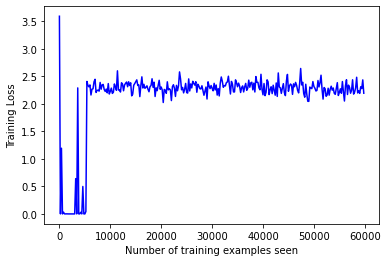

In [33]:
plot_loss(loss_list)

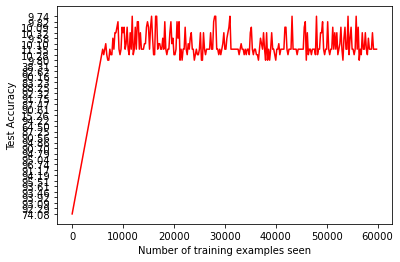

In [34]:
plot_acc(acc_list)

4.b

In [35]:
net = CNNModel()

#Optimizer
opt6 = torch.optim.SGD(net.parameters(), lr=Lr1, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [36]:
time2 = []
#Training
for epoch in range(1, Epochs + 1):
    t0 = time.time()
    train(net, epoch, opt6, cost, loss_list, acc_list, train3, test3, 20)
    t1 = time.time() - t0
    time2.append(t1)

#Testing
acc6 = test(net, test3)

Train Epoch: 1 [1900/60000 (3%)]	Loss: 2.2613
Train Epoch: 1 [3900/60000 (6%)]	Loss: 2.1156
Train Epoch: 1 [5900/60000 (10%)]	Loss: 1.7079
Train Epoch: 1 [7900/60000 (13%)]	Loss: 0.9577
Train Epoch: 1 [9900/60000 (16%)]	Loss: 0.5634
Train Epoch: 1 [11900/60000 (20%)]	Loss: 0.5514
Train Epoch: 1 [13900/60000 (23%)]	Loss: 0.6018
Train Epoch: 1 [15900/60000 (26%)]	Loss: 0.3232
Train Epoch: 1 [17900/60000 (30%)]	Loss: 0.4774
Train Epoch: 1 [19900/60000 (33%)]	Loss: 0.4124
Train Epoch: 1 [21900/60000 (36%)]	Loss: 0.2221
Train Epoch: 1 [23900/60000 (40%)]	Loss: 0.3393
Train Epoch: 1 [25900/60000 (43%)]	Loss: 0.3065
Train Epoch: 1 [27900/60000 (46%)]	Loss: 0.2477
Train Epoch: 1 [29900/60000 (50%)]	Loss: 0.2536
Train Epoch: 1 [31900/60000 (53%)]	Loss: 0.2026
Train Epoch: 1 [33900/60000 (56%)]	Loss: 0.1971
Train Epoch: 1 [35900/60000 (60%)]	Loss: 0.2266
Train Epoch: 1 [37900/60000 (63%)]	Loss: 0.1835
Train Epoch: 1 [39900/60000 (66%)]	Loss: 0.2594
Train Epoch: 1 [41900/60000 (70%)]	Loss: 0.1823

Train Epoch: 6 [45900/60000 (76%)]	Loss: 0.0590
Train Epoch: 6 [47900/60000 (80%)]	Loss: 0.0706
Train Epoch: 6 [49900/60000 (83%)]	Loss: 0.0086
Train Epoch: 6 [51900/60000 (86%)]	Loss: 0.0324
Train Epoch: 6 [53900/60000 (90%)]	Loss: 0.0546
Train Epoch: 6 [55900/60000 (93%)]	Loss: 0.0350
Train Epoch: 6 [57900/60000 (96%)]	Loss: 0.0740
Train Epoch: 6 [59900/60000 (100%)]	Loss: 0.0463
Train Epoch: 7 [1900/60000 (3%)]	Loss: 0.0828
Train Epoch: 7 [3900/60000 (6%)]	Loss: 0.0764
Train Epoch: 7 [5900/60000 (10%)]	Loss: 0.0215
Train Epoch: 7 [7900/60000 (13%)]	Loss: 0.0250
Train Epoch: 7 [9900/60000 (16%)]	Loss: 0.0264
Train Epoch: 7 [11900/60000 (20%)]	Loss: 0.0832
Train Epoch: 7 [13900/60000 (23%)]	Loss: 0.0414
Train Epoch: 7 [15900/60000 (26%)]	Loss: 0.0801
Train Epoch: 7 [17900/60000 (30%)]	Loss: 0.0191
Train Epoch: 7 [19900/60000 (33%)]	Loss: 0.1097
Train Epoch: 7 [21900/60000 (36%)]	Loss: 0.0254
Train Epoch: 7 [23900/60000 (40%)]	Loss: 0.0125
Train Epoch: 7 [25900/60000 (43%)]	Loss: 0.053

In [37]:
print('Test Accuracy with SGD Optimizer with momentum and 100 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc6))
print('Maximum time taken by an epoch =', max(time2))

Test Accuracy with SGD Optimizer with momentum and 100 mini-batch size on the 10000 test images:  98.8500
Maximum time taken by an epoch = 99.33276200294495


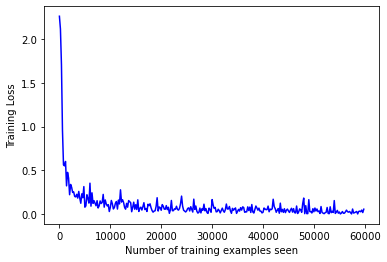

In [38]:
plot_loss(loss_list)

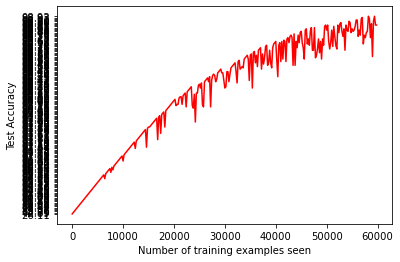

In [39]:
plot_acc(acc_list)

4.c

In [40]:
net = CNNModel()

#Optimizer
opt7 = torch.optim.SGD(net.parameters(), lr=Lr1, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [41]:
time3 = []
#Training
for epoch in range(1, Epochs + 1):
    t0 = time.time()
    train(net, epoch, opt7, cost, loss_list, acc_list, train4, test4, 2)
    t1 = time.time() - t0
    time3.append(t1)

#Testing
acc7 = test(net, test4)

Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.3128
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.3035
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.2969
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.2937
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.2863
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.2788
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.2748
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.2692
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.2660
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.2566
Train Epoch: 1 [21000/60000 (35%)]	Loss: 2.2463
Train Epoch: 1 [23000/60000 (38%)]	Loss: 2.2392
Train Epoch: 1 [25000/60000 (42%)]	Loss: 2.2268
Train Epoch: 1 [27000/60000 (45%)]	Loss: 2.2179
Train Epoch: 1 [29000/60000 (48%)]	Loss: 2.2050
Train Epoch: 1 [31000/60000 (52%)]	Loss: 2.1890
Train Epoch: 1 [33000/60000 (55%)]	Loss: 2.1808
Train Epoch: 1 [35000/60000 (58%)]	Loss: 2.1610
Train Epoch: 1 [37000/60000 (62%)]	Loss: 2.1523
Train Epoch: 1 [39000/60000 (65%)]	Loss: 2.1310
Train Epoch: 1 [41000/60000 (68%)]	Loss: 2.1129


Train Epoch: 6 [45000/60000 (75%)]	Loss: 0.2040
Train Epoch: 6 [47000/60000 (78%)]	Loss: 0.2017
Train Epoch: 6 [49000/60000 (82%)]	Loss: 0.2077
Train Epoch: 6 [51000/60000 (85%)]	Loss: 0.2234
Train Epoch: 6 [53000/60000 (88%)]	Loss: 0.1788
Train Epoch: 6 [55000/60000 (92%)]	Loss: 0.2060
Train Epoch: 6 [57000/60000 (95%)]	Loss: 0.2148
Train Epoch: 6 [59000/60000 (98%)]	Loss: 0.2207
Train Epoch: 7 [1000/60000 (2%)]	Loss: 0.3360
Train Epoch: 7 [3000/60000 (5%)]	Loss: 0.2440
Train Epoch: 7 [5000/60000 (8%)]	Loss: 0.1956
Train Epoch: 7 [7000/60000 (12%)]	Loss: 0.1959
Train Epoch: 7 [9000/60000 (15%)]	Loss: 0.1887
Train Epoch: 7 [11000/60000 (18%)]	Loss: 0.2207
Train Epoch: 7 [13000/60000 (22%)]	Loss: 0.1818
Train Epoch: 7 [15000/60000 (25%)]	Loss: 0.1716
Train Epoch: 7 [17000/60000 (28%)]	Loss: 0.1953
Train Epoch: 7 [19000/60000 (32%)]	Loss: 0.2040
Train Epoch: 7 [21000/60000 (35%)]	Loss: 0.2229
Train Epoch: 7 [23000/60000 (38%)]	Loss: 0.2044
Train Epoch: 7 [25000/60000 (42%)]	Loss: 0.1536


In [42]:
print('Test Accuracy with SGD Optimizer with momentum and 1000 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc7))
print('Maximum time taken by an epoch =', max(time3))

Test Accuracy with SGD Optimizer with momentum and 1000 mini-batch size on the 10000 test images:  96.0400
Maximum time taken by an epoch = 106.83111381530762


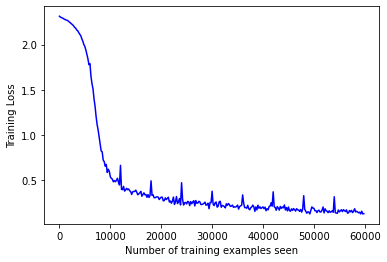

In [43]:
plot_loss(loss_list)

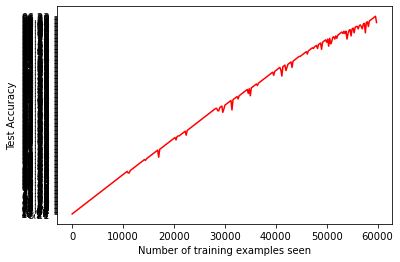

In [44]:
plot_acc(acc_list)

4.d

In [45]:
net = CNNModel()

#Optimizer
opt8 = torch.optim.SGD(net.parameters(), lr=Lr1, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [46]:
time4 = []
#Training
for epoch in range(1, Epochs + 1):
    t0 = time.time()
    train(net, epoch, opt8, cost, loss_list, acc_list, train5, test5, 1)
    t1 = time.time() - t0
    time4.append(t1)

#Testing
acc8 = test(net, test5)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.3129
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.3086
Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.3010
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.2985
Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.2920
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.2883
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.2907
Train Epoch: 2 [10000/60000 (17%)]	Loss: 2.2798
Train Epoch: 2 [20000/60000 (33%)]	Loss: 2.2770
Train Epoch: 2 [30000/60000 (50%)]	Loss: 2.2707
Train Epoch: 2 [40000/60000 (67%)]	Loss: 2.2651
Train Epoch: 2 [50000/60000 (83%)]	Loss: 2.2623
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.2684
Train Epoch: 3 [10000/60000 (17%)]	Loss: 2.2508
Train Epoch: 3 [20000/60000 (33%)]	Loss: 2.2447
Train Epoch: 3 [30000/60000 (50%)]	Loss: 2.2381
Train Epoch: 3 [40000/60000 (67%)]	Loss: 2.2313
Train Epoch: 3 [50000/60000 (83%)]	Loss: 2.2247
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.2380
Train Epoch: 4 [10000/60000 (17%)]	Loss: 2.2128
Train Epoch: 4 [20000/60000 (33%)]	Loss: 2.2054
Train Epoch:

In [47]:
print('Test Accuracy with SGD Optimizer with momentum and 10000 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc8))
print('Maximum time taken by an epoch =', max(time4))

Test Accuracy with SGD Optimizer with momentum and 10000 mini-batch size on the 10000 test images:  78.4700
Maximum time taken by an epoch = 57.2226037979126


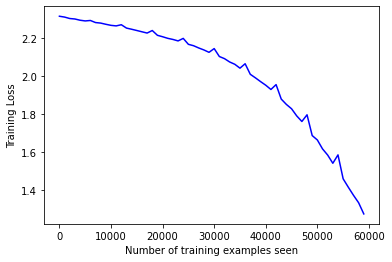

In [48]:
plot_loss(loss_list)

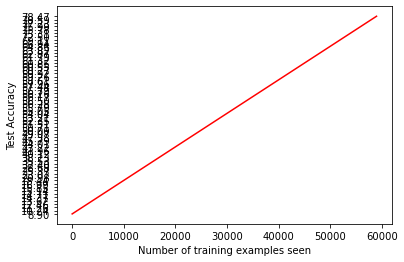

In [49]:
plot_acc(acc_list)

The best time performance is getting better with a larger mini-batch size.

The best accuracy performance is by mini-batch size 100.

Also, performance of network with mini-batch size as 1 is terrible and even with size 10000 is bad.
For size 1, loss is sometimes becoming nan because softmax function uses log function and log of zero is nan. Because of this the performance of size 1 is very poor

# Ques 5 

5.a

In [50]:
net = CNNModel()

opt9 = torch.optim.SGD(net.parameters(), lr=Lr2, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [51]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt9, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc9 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 0.6763
Train Epoch: 1 [3950/60000 (7%)]	Loss: 0.4883
Train Epoch: 1 [5950/60000 (10%)]	Loss: 0.1667
Train Epoch: 1 [7950/60000 (13%)]	Loss: 0.2159
Train Epoch: 1 [9950/60000 (17%)]	Loss: 0.2878
Train Epoch: 1 [11950/60000 (20%)]	Loss: 0.1655
Train Epoch: 1 [13950/60000 (23%)]	Loss: 0.1086
Train Epoch: 1 [15950/60000 (27%)]	Loss: 0.1489
Train Epoch: 1 [17950/60000 (30%)]	Loss: 0.1367
Train Epoch: 1 [19950/60000 (33%)]	Loss: 0.0486
Train Epoch: 1 [21950/60000 (37%)]	Loss: 0.0730
Train Epoch: 1 [23950/60000 (40%)]	Loss: 0.0596
Train Epoch: 1 [25950/60000 (43%)]	Loss: 0.0673
Train Epoch: 1 [27950/60000 (47%)]	Loss: 0.0030
Train Epoch: 1 [29950/60000 (50%)]	Loss: 0.2574
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.0561
Train Epoch: 1 [33950/60000 (57%)]	Loss: 0.1154
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.0358
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.0155
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.0148
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.0205

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.0063
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0000
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.0263
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.0070
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.0982
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.0071
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.0524
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.0578
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.0506
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.0033
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.0037
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.0007
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.0017
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.0069
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.0001
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0002
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.0151
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.0117
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0021
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.0202
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.108

In [52]:
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.1 on the 10000 test images: ', "{:.4f}".format(acc9))

Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.1 on the 10000 test images:  99.0200


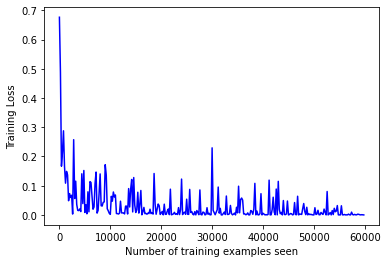

In [53]:
plot_loss(loss_list)

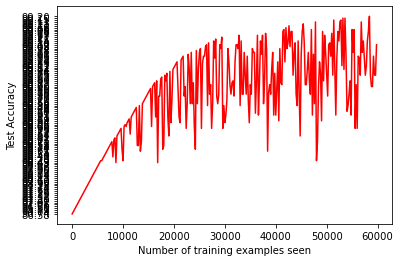

In [54]:
plot_acc(acc_list)

5.b

In [55]:
net = CNNModel()

opt10 = torch.optim.SGD(net.parameters(), lr=Lr1, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [56]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt10, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc10 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 1.6054
Train Epoch: 1 [3950/60000 (7%)]	Loss: 0.5998
Train Epoch: 1 [5950/60000 (10%)]	Loss: 0.4393
Train Epoch: 1 [7950/60000 (13%)]	Loss: 0.3451
Train Epoch: 1 [9950/60000 (17%)]	Loss: 0.5455
Train Epoch: 1 [11950/60000 (20%)]	Loss: 0.3062
Train Epoch: 1 [13950/60000 (23%)]	Loss: 0.1944
Train Epoch: 1 [15950/60000 (27%)]	Loss: 0.2339
Train Epoch: 1 [17950/60000 (30%)]	Loss: 0.1432
Train Epoch: 1 [19950/60000 (33%)]	Loss: 0.4806
Train Epoch: 1 [21950/60000 (37%)]	Loss: 0.1443
Train Epoch: 1 [23950/60000 (40%)]	Loss: 0.2116
Train Epoch: 1 [25950/60000 (43%)]	Loss: 0.1006
Train Epoch: 1 [27950/60000 (47%)]	Loss: 0.2057
Train Epoch: 1 [29950/60000 (50%)]	Loss: 0.1493
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.0833
Train Epoch: 1 [33950/60000 (57%)]	Loss: 0.0800
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.2134
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.0857
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.1139
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.1651

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.0315
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0749
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.0027
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.1428
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.0208
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.0071
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.0270
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.2490
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.1558
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.0369
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.0333
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.0115
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.0162
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.0697
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.0112
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0215
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.0395
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.0037
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0092
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.0367
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.003

In [57]:
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.01 on the 10000 test images: ', "{:.4f}".format(acc10))

Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.01 on the 10000 test images:  99.0600


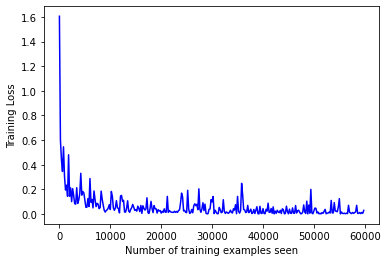

In [58]:
plot_loss(loss_list)

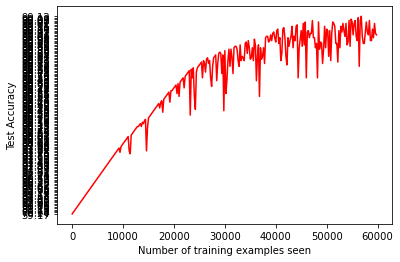

In [59]:
plot_acc(acc_list)

5.c

In [60]:
net = CNNModel()

opt11 = torch.optim.SGD(net.parameters(), lr=Lr3, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [61]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt11, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc11 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 2.3109
Train Epoch: 1 [3950/60000 (7%)]	Loss: 2.2428
Train Epoch: 1 [5950/60000 (10%)]	Loss: 2.2426
Train Epoch: 1 [7950/60000 (13%)]	Loss: 2.2123
Train Epoch: 1 [9950/60000 (17%)]	Loss: 2.2085
Train Epoch: 1 [11950/60000 (20%)]	Loss: 2.1163
Train Epoch: 1 [13950/60000 (23%)]	Loss: 2.1130
Train Epoch: 1 [15950/60000 (27%)]	Loss: 2.1176
Train Epoch: 1 [17950/60000 (30%)]	Loss: 2.0139
Train Epoch: 1 [19950/60000 (33%)]	Loss: 1.9265
Train Epoch: 1 [21950/60000 (37%)]	Loss: 1.8456
Train Epoch: 1 [23950/60000 (40%)]	Loss: 1.6582
Train Epoch: 1 [25950/60000 (43%)]	Loss: 1.4491
Train Epoch: 1 [27950/60000 (47%)]	Loss: 1.1990
Train Epoch: 1 [29950/60000 (50%)]	Loss: 1.1040
Train Epoch: 1 [31950/60000 (53%)]	Loss: 0.9897
Train Epoch: 1 [33950/60000 (57%)]	Loss: 1.1488
Train Epoch: 1 [35950/60000 (60%)]	Loss: 0.8613
Train Epoch: 1 [37950/60000 (63%)]	Loss: 0.4998
Train Epoch: 1 [39950/60000 (67%)]	Loss: 0.4922
Train Epoch: 1 [41950/60000 (70%)]	Loss: 0.5457

Train Epoch: 6 [45950/60000 (77%)]	Loss: 0.0722
Train Epoch: 6 [47950/60000 (80%)]	Loss: 0.0770
Train Epoch: 6 [49950/60000 (83%)]	Loss: 0.2039
Train Epoch: 6 [51950/60000 (87%)]	Loss: 0.0817
Train Epoch: 6 [53950/60000 (90%)]	Loss: 0.1438
Train Epoch: 6 [55950/60000 (93%)]	Loss: 0.1136
Train Epoch: 6 [57950/60000 (97%)]	Loss: 0.0987
Train Epoch: 6 [59950/60000 (100%)]	Loss: 0.0608
Train Epoch: 7 [1950/60000 (3%)]	Loss: 0.1856
Train Epoch: 7 [3950/60000 (7%)]	Loss: 0.1364
Train Epoch: 7 [5950/60000 (10%)]	Loss: 0.0671
Train Epoch: 7 [7950/60000 (13%)]	Loss: 0.0734
Train Epoch: 7 [9950/60000 (17%)]	Loss: 0.1065
Train Epoch: 7 [11950/60000 (20%)]	Loss: 0.2263
Train Epoch: 7 [13950/60000 (23%)]	Loss: 0.1909
Train Epoch: 7 [15950/60000 (27%)]	Loss: 0.0754
Train Epoch: 7 [17950/60000 (30%)]	Loss: 0.1056
Train Epoch: 7 [19950/60000 (33%)]	Loss: 0.1303
Train Epoch: 7 [21950/60000 (37%)]	Loss: 0.0598
Train Epoch: 7 [23950/60000 (40%)]	Loss: 0.1154
Train Epoch: 7 [25950/60000 (43%)]	Loss: 0.127

In [62]:
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.001 on the 10000 test images: ', "{:.4f}".format(acc11))

Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.001 on the 10000 test images:  97.3800


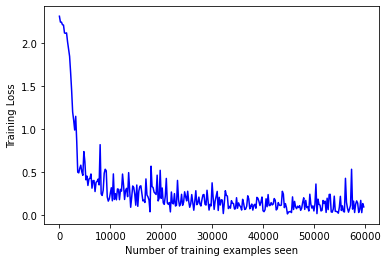

In [63]:
plot_loss(loss_list)

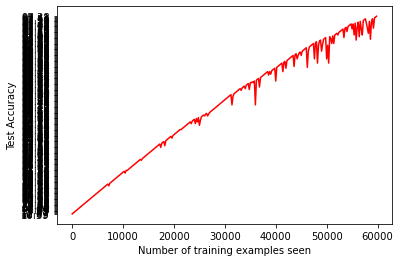

In [64]:
plot_acc(acc_list)

5.d

In [65]:
net = CNNModel()

opt12 = torch.optim.SGD(net.parameters(), lr=Lr4, momentum = momentum)

#For Plotting
loss_list = []
acc_list = []

In [66]:
#Training
for epoch in range(1, Epochs + 1):
    train(net, epoch, opt12, cost, loss_list, acc_list, train1, test1, 40)

#Testing
acc12 = test(net, test1)

Train Epoch: 1 [1950/60000 (3%)]	Loss: 2.3044
Train Epoch: 1 [3950/60000 (7%)]	Loss: 2.3139
Train Epoch: 1 [5950/60000 (10%)]	Loss: 2.3064
Train Epoch: 1 [7950/60000 (13%)]	Loss: 2.3212
Train Epoch: 1 [9950/60000 (17%)]	Loss: 2.2997
Train Epoch: 1 [11950/60000 (20%)]	Loss: 2.2943
Train Epoch: 1 [13950/60000 (23%)]	Loss: 2.3269
Train Epoch: 1 [15950/60000 (27%)]	Loss: 2.2862
Train Epoch: 1 [17950/60000 (30%)]	Loss: 2.3209
Train Epoch: 1 [19950/60000 (33%)]	Loss: 2.2925
Train Epoch: 1 [21950/60000 (37%)]	Loss: 2.2975
Train Epoch: 1 [23950/60000 (40%)]	Loss: 2.2984
Train Epoch: 1 [25950/60000 (43%)]	Loss: 2.3058
Train Epoch: 1 [27950/60000 (47%)]	Loss: 2.2868
Train Epoch: 1 [29950/60000 (50%)]	Loss: 2.2884
Train Epoch: 1 [31950/60000 (53%)]	Loss: 2.2794
Train Epoch: 1 [33950/60000 (57%)]	Loss: 2.2694
Train Epoch: 1 [35950/60000 (60%)]	Loss: 2.2969
Train Epoch: 1 [37950/60000 (63%)]	Loss: 2.2903
Train Epoch: 1 [39950/60000 (67%)]	Loss: 2.2760
Train Epoch: 1 [41950/60000 (70%)]	Loss: 2.2716

Train Epoch: 6 [45950/60000 (77%)]	Loss: 1.4141
Train Epoch: 6 [47950/60000 (80%)]	Loss: 1.4083
Train Epoch: 6 [49950/60000 (83%)]	Loss: 1.3449
Train Epoch: 6 [51950/60000 (87%)]	Loss: 1.3447
Train Epoch: 6 [53950/60000 (90%)]	Loss: 1.3216
Train Epoch: 6 [55950/60000 (93%)]	Loss: 1.4085
Train Epoch: 6 [57950/60000 (97%)]	Loss: 1.2434
Train Epoch: 6 [59950/60000 (100%)]	Loss: 1.2371
Train Epoch: 7 [1950/60000 (3%)]	Loss: 1.3728
Train Epoch: 7 [3950/60000 (7%)]	Loss: 1.2486
Train Epoch: 7 [5950/60000 (10%)]	Loss: 1.1922
Train Epoch: 7 [7950/60000 (13%)]	Loss: 1.2147
Train Epoch: 7 [9950/60000 (17%)]	Loss: 1.2306
Train Epoch: 7 [11950/60000 (20%)]	Loss: 1.1794
Train Epoch: 7 [13950/60000 (23%)]	Loss: 1.2750
Train Epoch: 7 [15950/60000 (27%)]	Loss: 1.2068
Train Epoch: 7 [17950/60000 (30%)]	Loss: 1.3191
Train Epoch: 7 [19950/60000 (33%)]	Loss: 1.1794
Train Epoch: 7 [21950/60000 (37%)]	Loss: 1.3168
Train Epoch: 7 [23950/60000 (40%)]	Loss: 1.0397
Train Epoch: 7 [25950/60000 (43%)]	Loss: 1.120

In [67]:
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.0001 on the 10000 test images: ', "{:.4f}".format(acc12))

Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.0001 on the 10000 test images:  87.4500


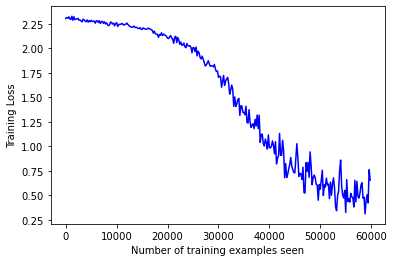

In [68]:
plot_loss(loss_list)

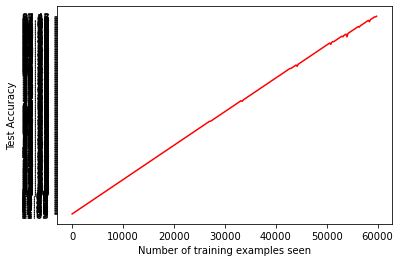

In [69]:
plot_acc(acc_list)

Best Overall Learning Rate Performance and convergence is of Learning Rate = 0.01

# Compilation of answers of all parts

# Ques 2

In [70]:
print('Test Accuracy with SGD Optimizer on the 10000 test images: ', "{:.4f}".format(acc1))

Test Accuracy with SGD Optimizer on the 10000 test images:  98.9800


# Ques 3

In [71]:
print('Test Accuracy with SGD Optimizer with momentum on the 10000 test images: ', "{:.4f}".format(acc2))
print('Test Accuracy with RMSProp on the 10000 test images: ', "{:.4f}".format(acc3))
print('Test Accuracy with Adam on the 10000 test images:', "{:.4f}".format(acc4))

Test Accuracy with SGD Optimizer with momentum on the 10000 test images:  98.7800
Test Accuracy with RMSProp on the 10000 test images:  97.6200
Test Accuracy with Adam on the 10000 test images: 97.9100


Best optimizer performance is of SGD with momentum 

# Ques 4

In [72]:
print('Test Accuracy with SGD Optimizer with momentum and 1 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc5))
print('Test Accuracy with SGD Optimizer with momentum and 100 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc6))
print('Test Accuracy with SGD Optimizer with momentum and 1000 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc7))
print('Test Accuracy with SGD Optimizer with momentum and 10000 mini-batch size on the 10000 test images: ', "{:.4f}".format(acc8))

print("Time taken by mini-batches")
print('Maximum time taken by an epoch for mini-batch 1 =', max(time1))
print('Maximum time taken by an epoch for mini-batch 100 =', max(time2))
print('Maximum time taken by an epoch for mini-batch 1000 =', max(time3))
print('Maximum time taken by an epoch for mini-batch 10000 =', max(time4))

Test Accuracy with SGD Optimizer with momentum and 1 mini-batch size on the 10000 test images:  11.3500
Test Accuracy with SGD Optimizer with momentum and 100 mini-batch size on the 10000 test images:  98.8500
Test Accuracy with SGD Optimizer with momentum and 1000 mini-batch size on the 10000 test images:  96.0400
Test Accuracy with SGD Optimizer with momentum and 10000 mini-batch size on the 10000 test images:  78.4700
Time taken by mini-batches
Maximum time taken by an epoch for mini-batch 1 = 314.38889503479004
Maximum time taken by an epoch for mini-batch 100 = 99.33276200294495
Maximum time taken by an epoch for mini-batch 1000 = 106.83111381530762
Maximum time taken by an epoch for mini-batch 10000 = 57.2226037979126


The best time performance is getting better with a larger mini-batch size.

The best accuracy performance is by mini-batch size 100.

Also, performance of network with mini-batch size as 1 is terrible and even with size 10000 is bad.
For size 1, loss is sometimes becoming nan because softmax function uses log function and log of zero is nan. Because of this the performance of size 1 is very poor

# Ques 5

In [73]:
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.1 on the 10000 test images: ', "{:.4f}".format(acc9))
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.01 on the 10000 test images: ', "{:.4f}".format(acc10))
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.001 on the 10000 test images: ', "{:.4f}".format(acc11))
print('Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.0001 on the 10000 test images: ', "{:.4f}".format(acc12))

Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.1 on the 10000 test images:  99.0200
Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.01 on the 10000 test images:  99.0600
Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.001 on the 10000 test images:  97.3800
Test Accuracy with SGD Optimizer with momentum and Learning rate = 0.0001 on the 10000 test images:  87.4500


Best Overall Learning Rate Performance and convergence is of Learning Rate = 0.01

References:
1. "https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/"
2. MNIST code provided by Professor.